## Mushroom classification
## TABLE OF CONTENTS

* [1. INTRODUCTION]
* [2. USED LIBRARIES]
* [3. DATA EXPLORATION]
    * [3.1. Detailed Information of the Dataset]
    * [3.2. Label Encoding]
    * [3.3. Correlation of Columns(Attributes)]
    * [3.4. Various Visualizations from Dataset]
* [4. CONCLUSION]


<a id="1"></a>
# 1. INTRODUCTION

In this study, EDA (Exploratory Data Analysis) related to "Mushroom Classification" dataset will be made and various classification models such as Logistic Regression, Gaussian Naive Bayes, Decision Tree, Random Forest, SVM and K-NN will be created. Then the dataset will be fit with these models and the results will be observed. In addition, in this study, a simple level of dimensionality reduction will be performed by PCA (Principal Component Analysis) method which plays an important role in reducing the number of features. In addition to this, the hyperparameter will be tuned with the Grid Search technique for each model. We will plot Confusion Matrix and ROC Curve for each model. Dataset has 8124 mushrooms with 23 different attributes. We'll create models that find poisonous or edible mushrooms given feature with classification algorithms.


# 2. USED LIBRARIES

This section will give information about Python libraries to be used in the study and these libraries will be imported into the project. Here are the libraries and explanations we will use:

* **NumPy :** This library is actually a dependency for other libraries. The main purpose of this library is to provide a variety of mathematical operations on matrices and vectors in Python. Our project will be used this library to provide support to other libraries.
* **Pandas :** This library performs import and processing of dataset in Python. In our project, it will be used to include the CSV extension dataset in the project and to perform various operations on it.
* **Matplotlib :** This library, which is usually used to visualize data. It will perform the same task in our project.
* **Seaborn :** This library which has similar features to Matplotlib is another library used for data visualization in Python. In our project, it will be used for the implementation of various features not included in the Matplotlib library.


Now let's import NumPy, Pandas, Matplotlib and Seaborn libraries into our project and get them ready for use:

In [2]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

# Ignore all warnings:
import warnings
warnings.filterwarnings("ignore")



<a id="3"></a>
# 3. DATA EXPLORATION

In this section, detailed information about dataset will be given and various visualizations will be made about features in dataset. In addition, during the "Data Preprocessing" step, the Label Encoding process will be performed. Because we need to convert them from "_object_" to numeric types so we can find the correlation between features. As you can see from this section, there will also be a correlation between features and will be plotted with the Heatmap.

<a id="31"></a>
## 3.1. Detailed Information of the Dataset

First of all we import our dataset and look at the quantities related to the columns with the "_info_" method:

In [3]:
data = pd.read_csv("E:/Mushrooms_classfication_project/notebook/mushrooms.csv")  # Read CSV file and load into "data" variable
data.info()  # Show detailed information for dataset columns(attributes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

There are 8124 records in this dataset. Each record is indexed from 0 to 8123. In addition, there is no missing value in this dataset. In the "_stalk-root_" column, the data indicated by "_?_" will be taken as "_None_". Therefore, there is no need to work for missing values in data cleaning. There are 23 columns in total and all of them are "_object_" type. Now, let's explain what the columns mean:

* **class :** It is the column that we will use as the target, indicating whether the mushroom is edible or poisonous. The values and the meaning of values of this column are as follows:
	* _e :_ Edible
	* _p :_ Poisonous
* **cap-shape :** It specifies the shape of the mushroom cap. The values that can be taken are:
	* _b :_ Bell
	* _c :_ Conical
	* _x :_ Convex
	* _f :_ Flat
	* _k :_ Knobbed
	* _s :_ Sunken or Depressed
![](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-cap-shape.jpg)
<br>
* **cap-surface :** It specifies the shape on the surface of the cap of the mushroom. The values that can be taken are:
	* _f :_ Fibrous
	* _g :_ Grooves
	* _y :_ Scaly
	* _s :_ Smooth
![](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-cap-surface.jpg)
<br>
* **cap-color :** It specifies the color of the cap of the mushroom. The values that can be taken are:
	* _n :_ Brown
	* _b :_ Buff
	* _c :_ Cinnamon
	* _g :_ Gray
	* _r :_ Green
	* _p :_ Pink
	* _u :_ Purple
	* _e :_ Red
	* _w :_ White
	* _y :_ Yellow
* **bruises :** Specifies whether the mushroom has bruises. The values that can be taken are:
	* _t :_ Exists
	* _f :_ Not Exists
![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Gyroporus_cyanescens_37226.jpg/640px-Gyroporus_cyanescens_37226.jpg)
<br>
* **odor :** Indicates the smell of mushrooms. The values that can be taken are:
	* _a :_ Almond
	* _l :_ Anise
	* _c :_ Creosote
	* _y :_ Fishy
	* _f :_ Foul
	* _m :_ Musty
	* _n :_ None
	* _p :_ Pungent
	* _s :_ Spicy
* **gill-attachment :** It specifies the connection between mushroom gill and its stem. The values that can be taken are:
	* _a :_ Attached
	* _d :_ Descending
	* _f :_ Free
	* _n :_ Notched
![](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-gill-attachment.jpg)
<br>
* **gill-spacing :** It specifies the spaces among mushroom gills. The values that can be taken are:
	* _c :_ Close
	* _w :_ Crowded
	* _d :_ Distant
![](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-gill-spacing.jpg)
<br>
* **gill-size :** It specifies the size of mushroom gills. The values that can be taken are:
	* _b :_ Broad
	* _n :_ Narrow
* **gill-color :** It specifies the color of mushroom gills. The values that can be taken are:
	* _k :_ Black
	* _n :_ Brown
	* _b :_ Buff
	* _h :_ Chocolate
	* _g :_ Gray
	* _r :_ Green
	* _o :_ Orange
	* _p :_ Pink
	* _u :_ Purple
	* _e :_ Red
	* _w :_ White
	* _y :_ Yellow
* **stalk-shape :** It specifies the shape of the mushroom stem. The values that can be taken are:
	* _e :_ Enlarging
	* _t :_ Tapering
* **stalk-root :** It specifies the shape of the mushroom root. The values that can be taken are:
	* _b :_ Bulbous
	* _c :_ Club Shaped
	* _u :_ Cup or Volva
	* _e :_ Equal
	* _z :_ Rhizomorphs
	* _r :_ Rooted
	* _? :_ Missing or None
![](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-stalk.jpg)
<br>
* **stalk-surface-above-ring :** It specifies the surface of the body piece above the ring. The values that can be taken are:
	* _f :_ Fibrous
	* _y :_ Scaly
	* _k :_ Silky
	* _s :_ Smooth
* **stalk-surface-below-ring :** It specifies the surface of the body piece below the ring. The values that can be taken are:
	* _f :_ Fibrous
	* _y :_ Scaly
	* _k :_ Silky
	* _s :_ Smooth
* **stalk-color-above-ring :** It specifies the color of the body piece above the ring. The values that can be taken are:
	* _n :_ Brown
	* _b :_ Buff
	* _c :_ Cinnamon
	* _g :_ Gray
	* _o :_ Orange
	* _p :_ Pink
	* _e :_ Red
	* _w :_ White
	* _y :_ Yellow
* **stalk-color-below-ring :** It specifies the color of the body piece below the ring. The values that can be taken are:
	* _n :_ Brown
	* _b :_ Buff
	* _c :_ Cinnamon
	* _g :_ Gray
	* _o :_ Orange
	* _p :_ Pink
	* _e :_ Red
	* _w :_ White
	* _y :_ Yellow
* **veil-type :** It specifies the veil type. The values that can be taken are:
	* _p :_ Partial
	* _u :_ Universal
* **veil-color :** It specifies the veil color. The values that can be taken are:
	* _n :_ Brown
	* _o :_ Orange
	* _w :_ White
	* _y :_ Yellow
* **ring-number :** It specifies the ring numbers in stem of the mushroom. The values that can be taken are:
	* _n :_ None
	* _o :_ One
	* _t :_ Two
* **ring-type :** It specifies the shape of the ring in stem of the mushroom. The values that can be taken are:
	* _c :_ Cobwebby
	* _e :_ Evanescent
	* _f :_ Flaring
	* _l :_ Large
	* _n :_ None
	* _p :_ Pendant
	* _s :_ Sheathing
	* _z :_ Zone
![](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-ring-type.jpg)
<br>
* **spore-print-color :** It specifies the color of mushroom spores. The values that can be taken are:
	* _k :_ Black
	* _n :_ Brown
	* _b :_ Buff
	* _h :_ Chocolate
	* _r :_ Green
	* _o :_ Orange
	* _u :_ Purple
	* _w :_ White
	* _y :_ Yellow
* **population :** It specifies the rate at which the mushroom is present in the population. The values that can be taken are:
	* _n :_ Numerous	
	* _a :_ Abundant
	* _v :_ Several
	* _c :_ Clustered
	* _s :_ Scattered
	* _y :_ Solitary
* **habitat :** It specifies the habitat the mushroom is in. The values that can be taken are:
	* _g :_ Grasses
	* _l :_ Leaves
	* _m :_ Meadows
	* _p :_ Paths
	* _u :_ Urban
	* _w :_ Waste
	* _d :_ Woods

We gave the necessary information about dataset. Now, looking at the first 5 and last 5 entries of dataset, what are the values that are being held:

In [4]:
data.head()  # Prints first 5 entries of the dataset

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
data.tail()  # Prints last 5 entries of the dataset

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


For correlation and many statistical analyzes, data must be of a numerical type. So before going on to the next step, we'll do the Label Encoding event here. Label Encoding is the conversion of categorical data to the corresponding integers.

<a id="32"></a>
## 3.2. Label Encoding

For Label Encoding we will use the "_LabelEncoder_" class of the Scikit-Learn library. With the "*fit_transform*" method of this class, we will be able to cycle and transform values through all columns. Let's write our code as follows:

In [6]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder class

label_encoder = LabelEncoder()  # Create a instance for the label encoder
encoded_data = pd.DataFrame()  # Create empty DataFrame

for column in data.columns:
    encoded_data[column] = label_encoder.fit_transform(data[column])  # Iterate all columns and transform its values

Now let's take a look at the data we encode:

In [7]:
encoded_data.head()  # Print first 5 record for the encoded data

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


We kept them in separate variables. Because sometimes categorical data will be useful in some statistics. Finally, let's examine the output of our "_describe_" function and go to the next section:

In [8]:
encoded_data.describe()  # Print some statistics for data

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


<a id="33"></a>
## 3.3. Correlation of Columns(Attributes)

In this section, we'll find the correlation matrix between the columns and we'll visualize it into a Heatmap. In this way, we will be able to see the relationship between the attributes more clearly and visualize them in the future.

In [9]:
encoded_data.corr()  # Prints correlation matrix

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap_shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap_surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap_color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill_attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill_spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill_size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill_color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


Now we visualize this correlation matrix with Heatmap:

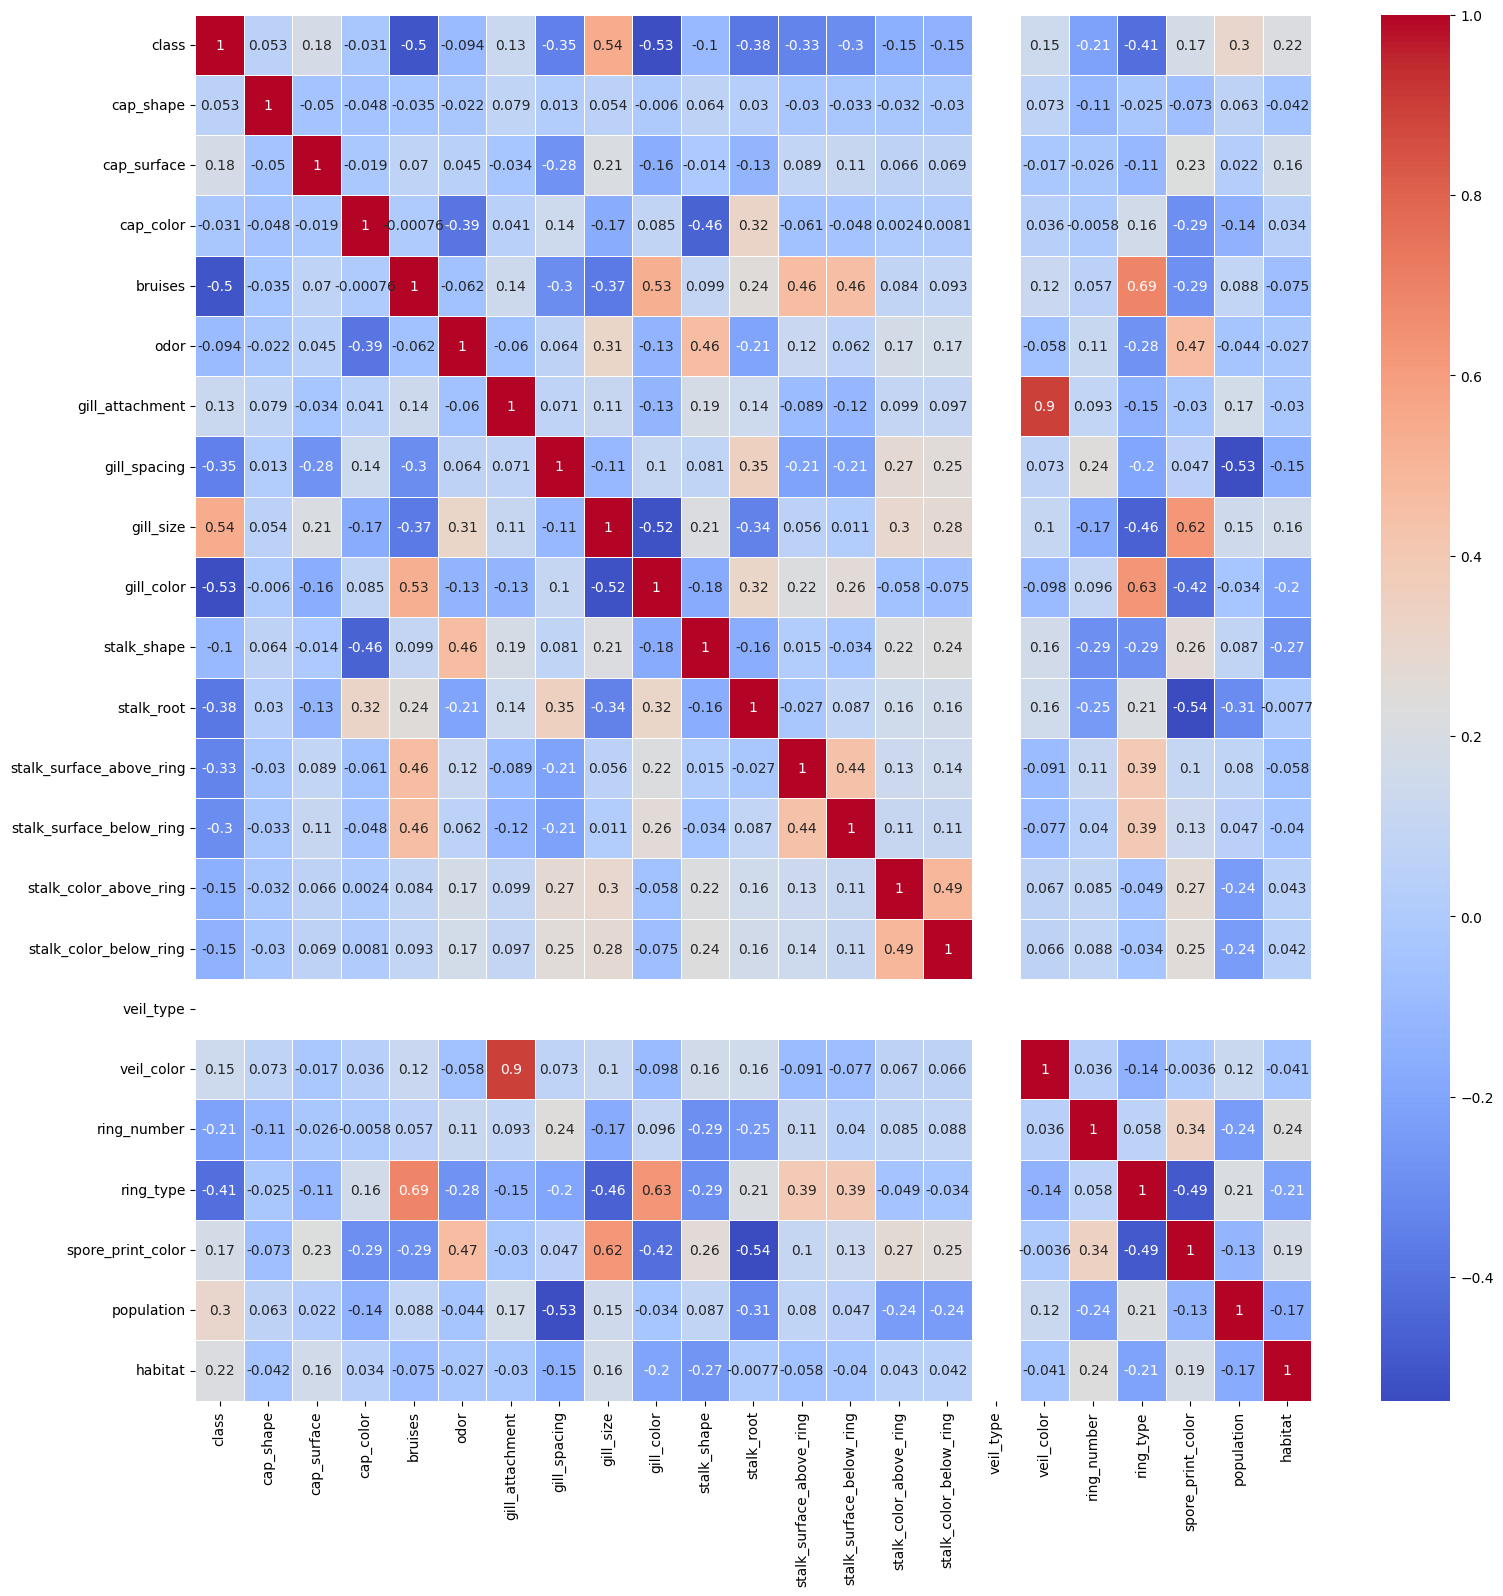

In [10]:
fig, axes = plt.subplots(figsize=(18, 18))  # This method creates a figure and a set of subplots
sns.heatmap(data=encoded_data.corr(), annot=True, linewidths=.5, cmap="coolwarm", ax=axes)  # Figure out heatmap
plt.show()  # Shows only plot and remove other informations

We cannot see any statistical data or any correlation in the "*veil-type*" column. This is because this attribute has a single value for all records. This means that it is a useless column for us. In the future we will drop this column from dataset.

<a id="34"></a>
## 3.4. Various Visualizations from Dataset

In this section we will perform various visualization operations related to dataset. First, let's take a look at the statistics of the columns with a correlation greater than 0.3 and less than -0.3 and the "_class_" column:

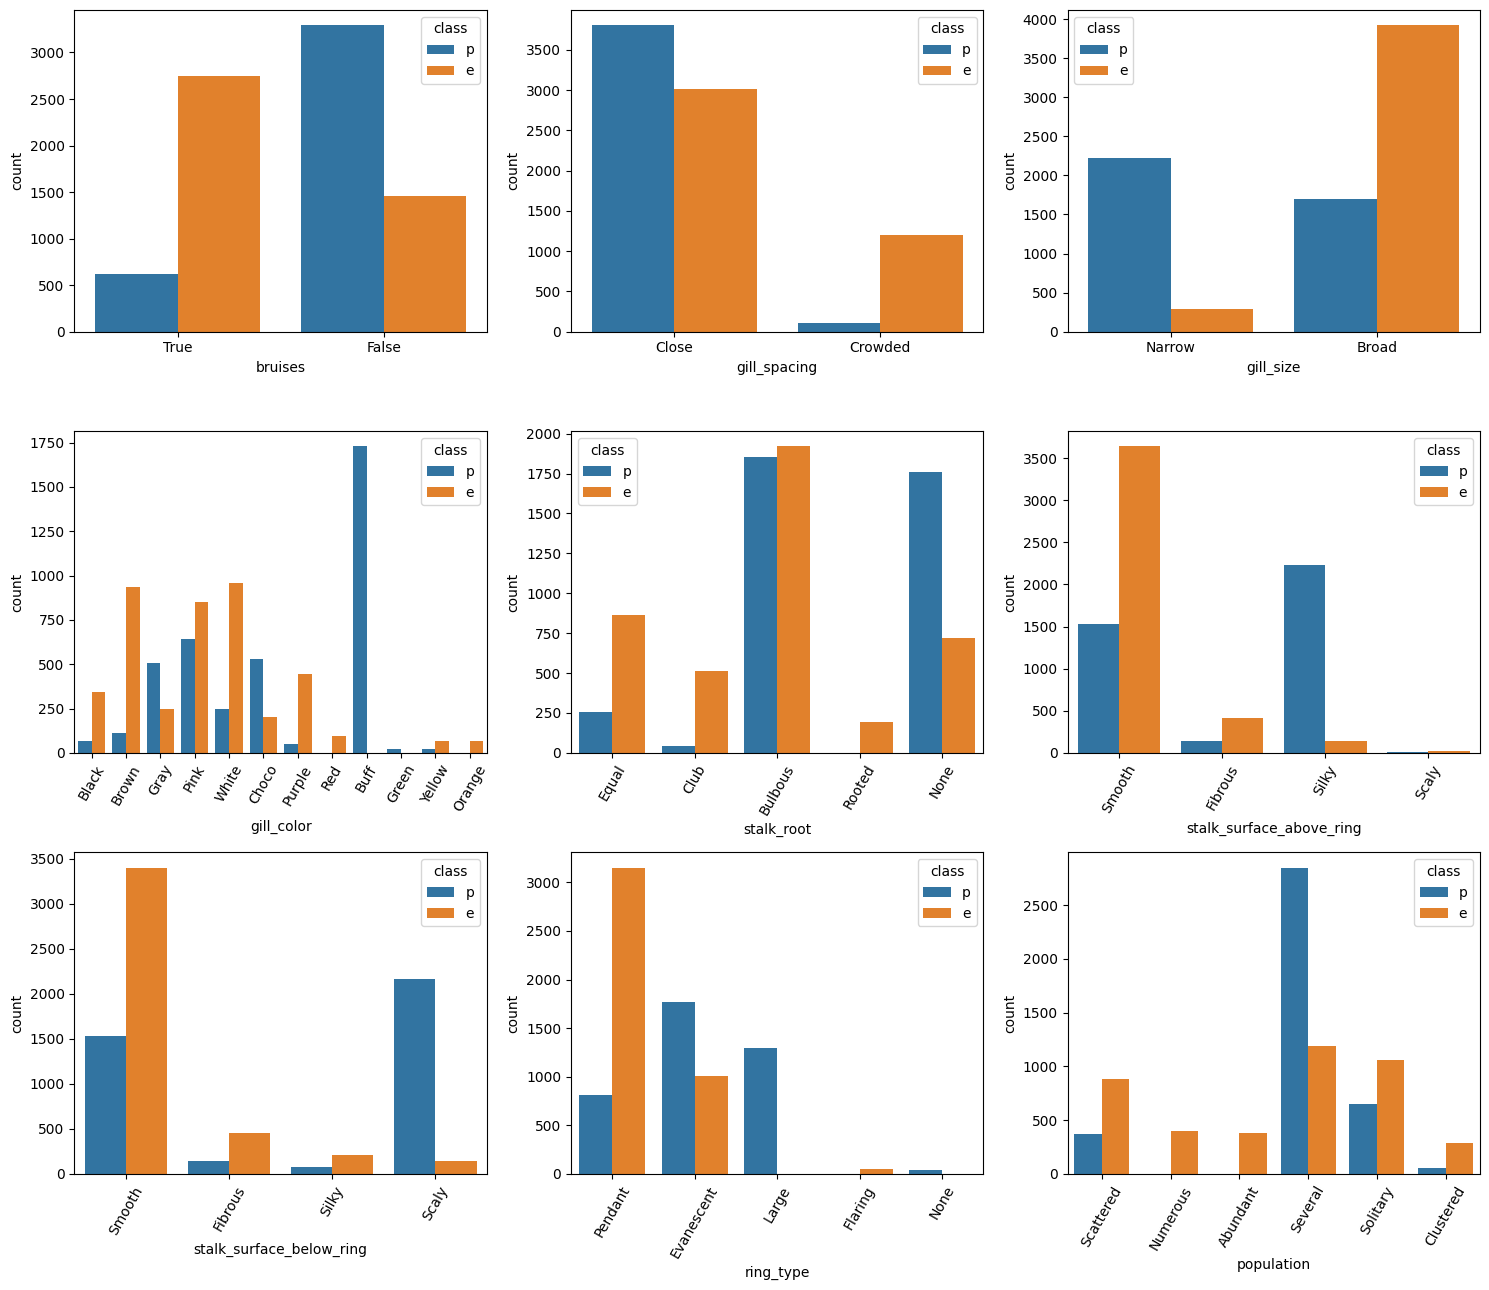

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 13))  # Adjust subplots

# Draw frequency of the "bruises" values according to "class":
bruises_bar = sns.countplot(x="bruises", hue="class", data=data, ax=axes[0][0]);
bruises_bar.set_xticklabels(["True", "False"])

# Draw frequency of the "gill-spacing" values according to "class":
gill_spacing_bar = sns.countplot(x="gill_spacing", hue="class", data=data, ax=axes[0][1]);
gill_spacing_bar.set_xticklabels(["Close", "Crowded", "Distant"])

# Draw frequency of the "gill-size" values according to "class":
gill_size_bar = sns.countplot(x="gill_size", hue="class", data=data, ax=axes[0][2]);
gill_size_bar.set_xticklabels(["Narrow", "Broad"])

# Draw frequency of the "gill-color" values according to "class":
gill_color_bar = sns.countplot(x="gill_color", hue="class", data=data, ax=axes[1][0]);
gill_color_bar.set_xticklabels(["Black", "Brown", "Gray", "Pink", "White", "Choco", "Purple", "Red", "Buff", "Green", "Yellow", "Orange"], rotation=60)

# Draw frequency of the "stalk-root" values according to "class":
stalk_root_bar = sns.countplot(x="stalk_root", hue="class", data=data, ax=axes[1][1]);
stalk_root_bar.set_xticklabels(["Equal", "Club", "Bulbous", "Rooted", "None"], rotation=60)

# Draw frequency of the "stalk-surface-above-ring" values according to "class":
stalk_sar_bar = sns.countplot(x="stalk_surface_above_ring", hue="class", data=data, ax=axes[1][2]);
stalk_sar_bar.set_xticklabels(["Smooth", "Fibrous", "Silky", "Scaly"], rotation=60)

# Draw frequency of the "stalk-surface-below-ring" values according to "class":
stalk_sbr_bar = sns.countplot(x="stalk_surface_below_ring", hue="class", data=data, ax=axes[2][0]);
stalk_sbr_bar.set_xticklabels(["Smooth", "Fibrous", "Silky", "Scaly"], rotation=60)

# Draw frequency of the "ring-type" values according to "class":
ring_type_bar = sns.countplot(x="ring_type", hue="class", data=data, ax=axes[2][1]);
ring_type_bar.set_xticklabels(["Pendant", "Evanescent", "Large", "Flaring", "None"], rotation=60)

# Draw frequency of the "population" values according to "class":
population_bar = sns.countplot(x="population", hue="class", data=data, ax=axes[2][2]);
population_bar.set_xticklabels(["Scattered", "Numerous", "Abundant", "Several", "Solitary", "Clustered"], rotation=60)

fig.tight_layout()  # Slightly spacing between axis labels and values
plt.show()

Now let's show the distribution of the edible and poisonous classes with the Pie Chart:

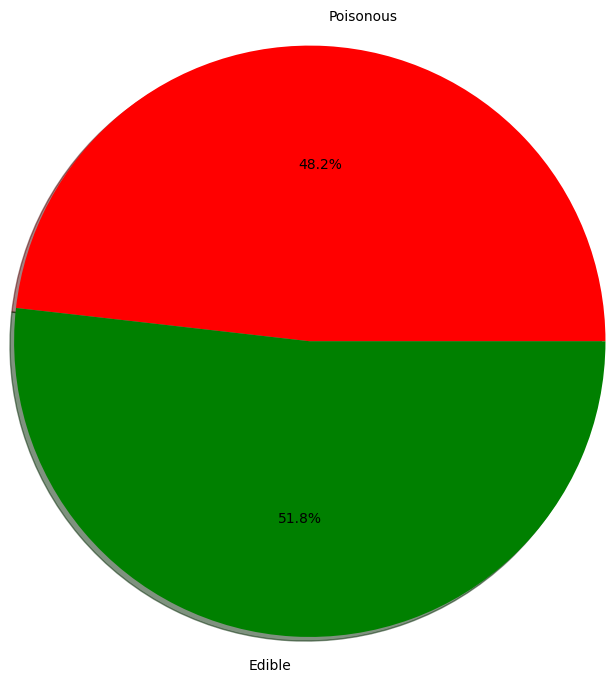

In [13]:
poisonous_count = len(data[data["class"] == "p"].index)  # Get poisonous count
edible_count = len(data[data["class"] == "e"].index)  # Get edible count

# Draw Pie Chart:
plt.pie([poisonous_count, edible_count], labels=["Poisonous", "Edible"], autopct='%1.1f%%', radius=2.0, shadow=True, colors=["r", "g"])
plt.show()

Finally, let's show with the Stacked Bar Chart how much poisonous mushrooms are found in the habitats:

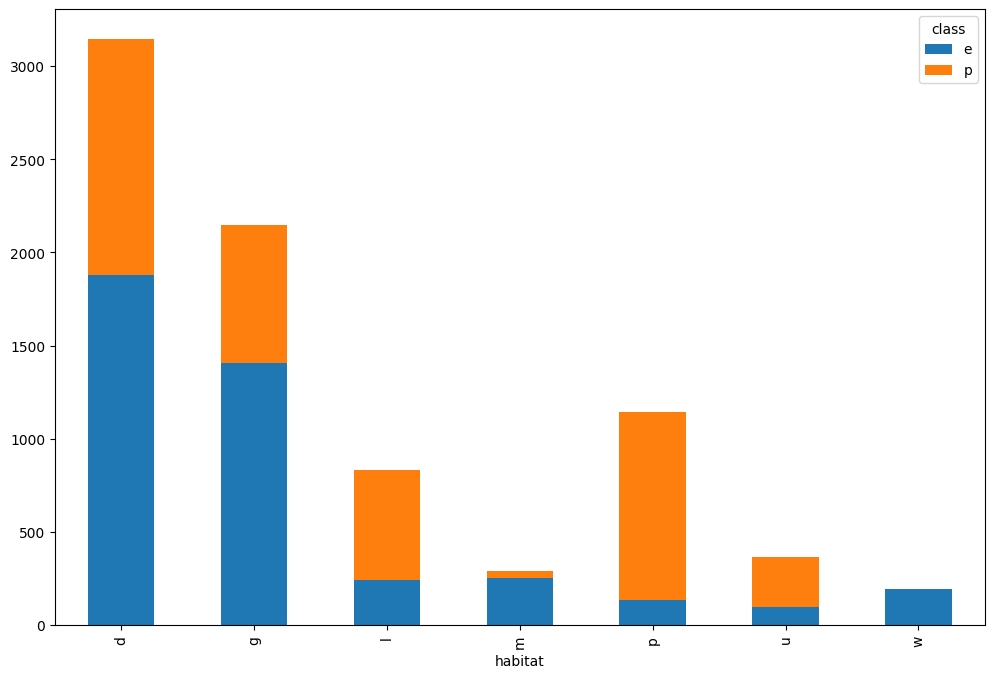

In [14]:
fig, ax = plt.subplots(figsize=(12,8))  # For specify figure size
data.groupby(['habitat', 'class']).size().unstack().plot.bar(stacked=True, ax=ax)  # Draw Stacked Bar Chart
plt.show()

<a id="8"></a>
# 8. CONCLUSION

This kernel contains 6 different classification algorithms and works on "Mushroom Classification" dataset. In addition, EDA (Exploratory Data Analysis) was performed for dataset. I tried to give you the following information on this kernel:

* How to make a dataset's EDA (Exploratory Data Analysis) process simply
* How libraries such as Pandas, Matplotlib, Seaborn and Scikit-Learn are used in classification models
* How to convert category data to numerical data with Label Encoding
* How we can graphically show the relationship between the various columns
* How to draw graphics such as Pie Chart, Bar Chart, Stacked Bar Chart and Heatmap with Seaborn and Matplotlib
* How to perform Scaling on data
